### **Supervised**: `Imbalance Data`

**Definition**: Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e. one class label has a very high number of observations and the other has a very low number of observations.

What counts as imbalanced? The answer could range from mild to extreme, as the link [here](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)

In [11]:
# Import required libraries
import pandas as pd 
import numpy as np
from collections import Counter

# Load the dataset
data = pd.read_csv('../csv/white_wine.csv')

# Do a short data preprocessing
data['alcohol'].fillna(data['alcohol'].mean(), inplace=True)
data['label'] = np.where(data['quality'] > 6, 1, 0)

# Check the class distribution 
print("Class distribution:", Counter(data['label']))

Class distribution: Counter({0: 422, 1: 98})


C:\Users\Fiki\AppData\Local\Temp\ipykernel_4604\4034789272.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['alcohol'].fillna(data['alcohol'].mean(), inplace=True)


In [12]:
data['label'].value_counts(normalize=True)

label
0    0.811538
1    0.188462
Name: proportion, dtype: float64

You will find that the distribution is moderate imbalanced with 18.8% positive class and 81.2% negative class. The minority class is the good quality one, we might more interest to detect a wine with good quality than the common one.

We will develop the model only using two features alcohol and density. Using the scatterplot you can see how those feature can differentiate the wine quality. Generally, wine with good quality has high alcohol and high density.

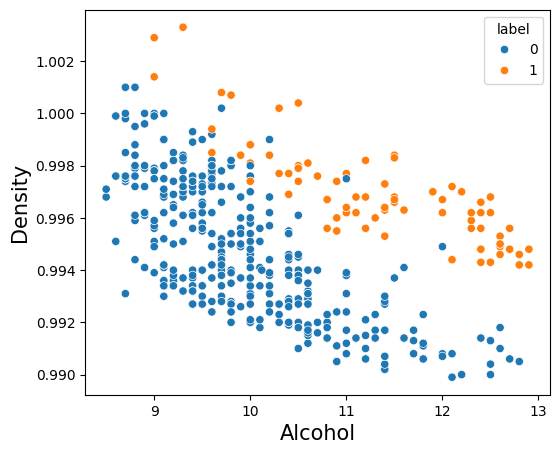

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Display the distribution of class 1 and 0 in a scatter plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x='alcohol', y='density', data=data, hue='label')
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

Split data into train and test sets

In [14]:
from sklearn.model_selection import train_test_split


X = data[['density','alcohol']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,random_state=2020,stratify=y)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

print(f'Class distribution in train set {Counter(y_train)}')
print(f'Class distribution in train set {Counter(y_test)}')

Class distribution in train set Counter({0: 338, 1: 78})
Class distribution in train set Counter({0: 84, 1: 20})


In [15]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.800000,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.500000,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.100000,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.900000,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.900000,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.400000,6.0,0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.100000,5.0,0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.400000,6.0,0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.800000,6.0,0


Then, we try to build a classification model using logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred  = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        84
           1       0.75      0.45      0.56        20

    accuracy                           0.87       104
   macro avg       0.82      0.71      0.74       104
weighted avg       0.86      0.87      0.85       104



Here the classification model will tend to perform well in one of the classes only, where the precision, recall, and f1 score values of the majority class have higher values. Let's try to deal with by implementing some of the following strategies.

**1. Feature Creation,** creating good new features will make it easier for classification models to distinguish between classes.

We will do the modeling process with adding polynomial features and see the changes.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

#tambahkan poly biar makin bagus predict score nya
poly = PolynomialFeatures(degree=3, include_bias=False,interaction_only=False)

poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)


In [18]:
logreg.fit(X_train_poly,y_train)
y_pred_poly = logreg.predict(X_test_poly)

print(classification_report(y_test,y_pred_poly))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.90      0.95        20

    accuracy                           0.98       104
   macro avg       0.99      0.95      0.97       104
weighted avg       0.98      0.98      0.98       104



c:\Users\Fiki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


From illustration above, you can see the performance improvement of the logistic regression model.

**2. Random Oversampling & Undersampling:** are techniques commonly used in dealing with imbalanced datasets in machine learning.

Random oversampling aims to balance the class distribution by increasing the number of instances in the minority class. This is achieved by randomly duplication or replicating instance from that minority class until it reaches a desired balance with the majority class.

Advantages:

- Unlike undersampling, this method leads to no information loss.

Disadvantages:

- It increases the likelihood of overfitting since it replicates the minority class events.

In [19]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled,y_resampled = ros.fit_resample(X_train,y_train)

print(f'Class distribution before Oversampling {Counter(y_train)}')
print(f'Class distribution after Oversampling {Counter(y_resampled)}')


logreg.fit(X_resampled,y_resampled)

y_pred_resampled = logreg.predict(X_test)

print(classification_report(y_test,y_pred_resampled))


Class distribution before Oversampling Counter({0: 338, 1: 78})
Class distribution after Oversampling Counter({0: 338, 1: 338})
              precision    recall  f1-score   support

           0       0.96      0.76      0.85        84
           1       0.46      0.85      0.60        20

    accuracy                           0.78       104
   macro avg       0.71      0.81      0.72       104
weighted avg       0.86      0.78      0.80       104



Random undersampling aims to balance the dataset by reducing the number of instances in the majority class to match the number of instances in the minority class. This is achieved by randomly selected instances are removed from the dataset, leaving a reduced dataset with a more balanced class distibution.

Advantages:

- It can help improve the runtime of the model and solve the memory problems.

Disadvantages:

- It can discard useful information about the data itself which could be necessary for building classifiers.

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled,y_resampled = rus.fit_resample(X_train,y_train)

print(f'Class distribution before Undersampling {Counter(y_train)}')
print(f'Class distribution after Undersampling {Counter(y_resampled)}')


logreg.fit(X_resampled,y_resampled)

y_pred_resampled = logreg.predict(X_test)

print(classification_report(y_test,y_pred_resampled))


Class distribution before Undersampling Counter({0: 338, 1: 78})
Class distribution after Undersampling Counter({0: 78, 1: 78})
              precision    recall  f1-score   support

           0       0.96      0.76      0.85        84
           1       0.46      0.85      0.60        20

    accuracy                           0.78       104
   macro avg       0.71      0.81      0.72       104
weighted avg       0.86      0.78      0.80       104



**3. Nearmiss,** refers fo a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.

There are three versions of the technique, [here](https://imbalanced-learn.org/stable/auto_examples/under-sampling/plot_illustration_nearmiss.html#sphx-glr-auto-examples-under-sampling-plot-illustration-nearmiss-py)

- version-1: Majority class examples with minimum average distance to three closest minority class examples.
- version-2: Majority class examples with minimum average distance to three furthest minority class examples.
- version-3: A nearest-neighbors is used to short-list samples from the majority class. Then, the sample with the largest average distance to the k-nearest-neigbors are selected.

In [21]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(version=3, n_neighbors=3)
X_resampled,y_resampled = nm.fit_resample(X_train,y_train)

print(f'Class distribution before Nearmiss {Counter(y_train)}')
print(f'Class distribution after Nearmiss {Counter(y_resampled)}')


logreg.fit(X_resampled,y_resampled)

y_pred_resampled = logreg.predict(X_test)

print(classification_report(y_test,y_pred_resampled))


Class distribution before Nearmiss Counter({0: 338, 1: 78})
Class distribution after Nearmiss Counter({1: 78, 0: 72})
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        84
           1       0.54      0.75      0.62        20

    accuracy                           0.83       104
   macro avg       0.73      0.80      0.76       104
weighted avg       0.86      0.83      0.84       104



c:\Users\Fiki\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


**4. SMOTE**: it works by selecting a minority class instance a at random and finds its k nearest minority class neighbors.

How it work? The synthetic instance is then created by choosing one of the k nearest neigbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b. You can learn more details [here](https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_illustration_generation_sample.html).

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X_train,y_train)

print(f'Class distribution before SMOTE {Counter(y_train)}')
print(f'Class distribution after SMOTE {Counter(y_resampled)}')


logreg.fit(X_resampled,y_resampled)

y_pred_resampled = logreg.predict(X_test)

print(classification_report(y_test,y_pred_resampled))


Class distribution before SMOTE Counter({0: 338, 1: 78})
Class distribution after SMOTE Counter({0: 338, 1: 338})
              precision    recall  f1-score   support

           0       0.96      0.76      0.85        84
           1       0.46      0.85      0.60        20

    accuracy                           0.78       104
   macro avg       0.71      0.81      0.72       104
weighted avg       0.86      0.78      0.80       104



The following example attends to make a graphical comparison between the different resampling algorithms.

c:\Users\Fiki\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


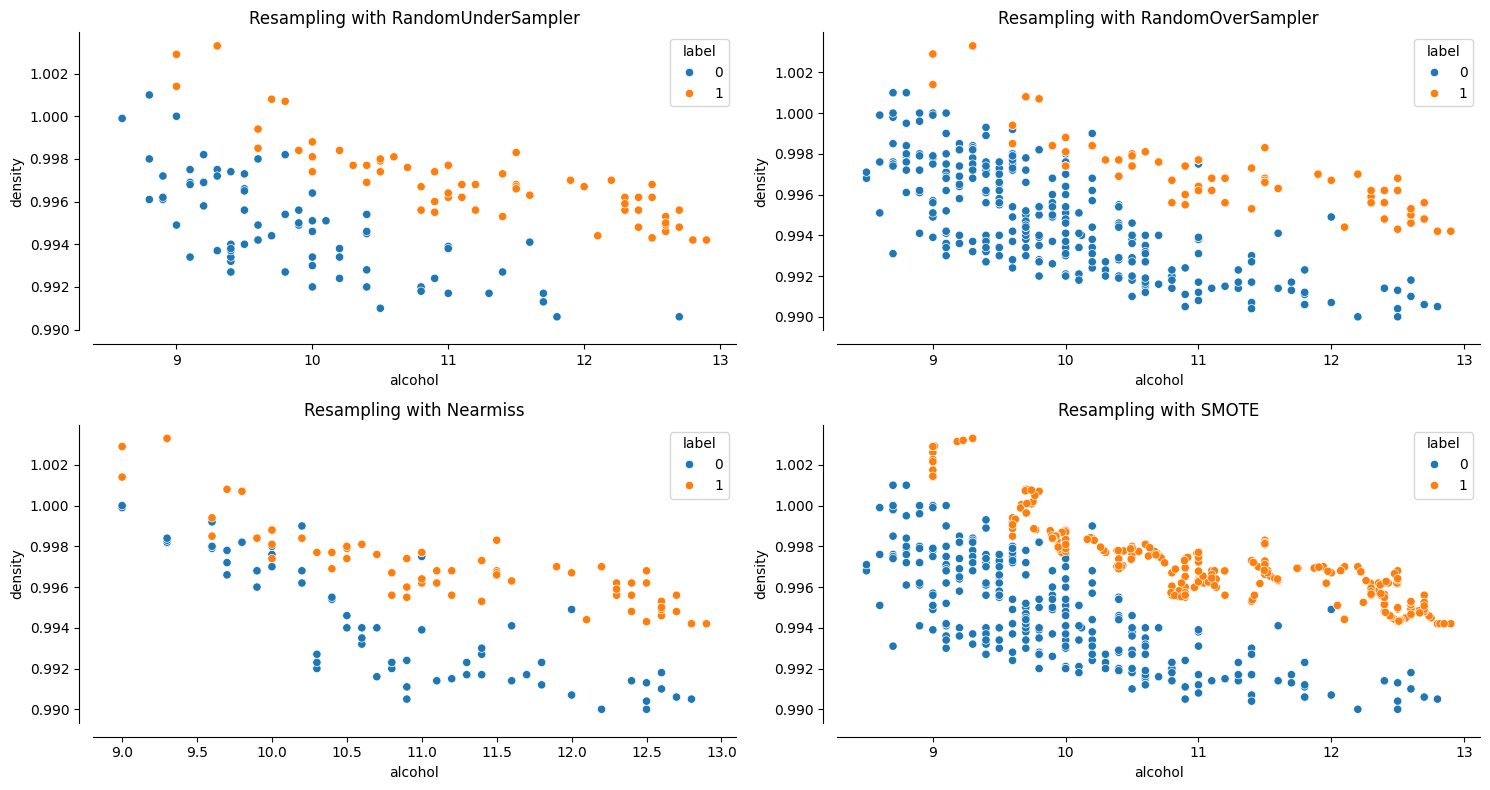

In [23]:
# Define function to create scatter plot visualization
def plot_resampling(X, y, sampler, ax, title=None):
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    sns.scatterplot(x=X_resampled['alcohol'], y=X_resampled['density'], hue=y_resampled, ax=ax)
    if title is None:
        title = f'Resampling with {sampler.__class__.__name__}'
    ax.set_title(title)
    sns.despine(ax=ax, offset=10)

# Determine which resampling method to compare
samplers = [
    RandomUnderSampler(random_state=42),
    RandomOverSampler(random_state=42),
    NearMiss(version=3),
    SMOTE(random_state=42)
]

# Set title for each graph
titles = [
    'Resampling with RandomUnderSampler',
    'Resampling with RandomOverSampler',
    'Resampling with Nearmiss',
    'Resampling with SMOTE',
]

# Figure size and axes configuration
fig, axes = plt.subplots(2, 2, figsize=(15, 8))


# Show the plot
for ax, sampler, title in zip(axes.ravel(), samplers, titles):
    plot_resampling(X_train, y_train, sampler, ax, title=title)

fig.tight_layout()

**5. Penalize Model**, adding penalty weights injects intentional bias into the model. With penalty weights, model towards paying more attention to the minority class during training, thus creating a balance between the classes.

In [24]:
logreg_balanced = LogisticRegression(class_weight={0:1,1:10})
logreg_balanced.fit(X_train,y_train)
y_pred_balanced = logreg_balanced.predict(X_test)
print(classification_report(y_test,y_pred_balanced))

              precision    recall  f1-score   support

           0       0.98      0.52      0.68        84
           1       0.32      0.95      0.48        20

    accuracy                           0.61       104
   macro avg       0.65      0.74      0.58       104
weighted avg       0.85      0.61      0.64       104



**6. Using a Variety of Metrics**: Performance metrics may be needed that focus on the minority class, which is made challenging because it is the minority class where we lack observations required to train an effective model.

Let's look at some examples of different metrics from which we might choose.

**6.1 Balanced Accuracy**, it's the arithmetic mean of sensitivity and specificity.

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        84
           1       0.75      0.45      0.56        20

    accuracy                           0.87       104
   macro avg       0.82      0.71      0.74       104
weighted avg       0.86      0.87      0.85       104



In [26]:
from sklearn.metrics import accuracy_score,balanced_accuracy_score

print(f'Accuracy score {accuracy_score(y_test,y_pred):.3f}')
print(f'Balanced score {balanced_accuracy_score(y_test,y_pred):.3f}')

Accuracy score 0.865
Balanced score 0.707


**6.2 Geometric mean**, sensitivity and specificity can be combined into a single score that balances both concerns.

In [27]:
from sklearn.metrics import recall_score, precision_score

sensitivity = recall_score(y_test,y_pred, pos_label=1)
specificity = recall_score(y_test, y_pred, pos_label=0)
precision = precision_score(y_test, y_pred)

print(f'Geometric mean 1 {np.sqrt(sensitivity*specificity):.2f}')
print(f'Geometric mean 2 {np.sqrt(sensitivity*precision):.2f}')

Geometric mean 1 0.66
Geometric mean 2 0.58


**6.3 F-beta Measure**, an abstraction of the F-measure where the balance of precision and recall is controlled by a coefficient called beta.

In [28]:
from sklearn.metrics import fbeta_score

print(f'F2 score {fbeta_score(y_test,y_pred, beta=2):.2f}') #recall 2x lebih penting dari precision
print(f'F0.5 score {fbeta_score(y_test,y_pred, beta=.5):.2f}') #recall 2x lebih penting dari recall

F2 score 0.49
F0.5 score 0.66


**6.4 Brier Score**, it measures the mean squared difference between the predicted probabilit and the actual outcome.

In [29]:
from sklearn.metrics import brier_score_loss

y_proba = logreg.predict_proba(X_test)[:,1]

print(f'Brier Score Loss {brier_score_loss(y_test,y_proba):.2f}')

Brier Score Loss 0.16


**Implementation Using Pipeline**

In [30]:
# untuk menyatukan resampling dengan seluruh fungsi pada sklearn
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

# define model
logreg = LogisticRegression()

# define resampler
smote = SMOTE(random_state=0)

# pipeline
pipe_model=Pipeline([
    ('resampler', smote),
    ('modeling', logreg)
])

# cross validation
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(
    estimator = pipe_model,
    X = X_train,
    y = y_train,
    cv= skfold,
    scoring = 'f1'
)

cv_score.mean()

np.float64(0.543686339400625)

**Note**:
Untuk kedepannya gunakan fungsi Pipeline dari imblearn dengan keunggulan sebagai berikut:
- dapat menyatukan proses resampling pada imblearn dengan seluruh fungsi pada sklearn
- mampu membedakan train set dan test set sehingga hanya akan melakukan proses resampling dalam Pipeline pada train set (ingat resampling hanya dilakukan pada train set untuk latihan, sedangkan `test set tidak boleh dilakukan resampling` karena menggambarkan kondisi real)